# Rain Prediction

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [6]:
rain_data = pd.read_csv('Project-8-Rain Prediction.csv')
rain_data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


## Basic Data Analysis

### First Five Rows

In [9]:
rain_data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


### Last Five Rows

In [11]:
rain_data.tail()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain
2499,26.554356,97.101517,18.563084,81.357508,1001.729176,no rain


### Total Number of Rows and Columns in dataset

In [13]:
rain_data.shape

(2500, 6)

In [14]:
print(f'Number of Rows in datasets = {rain_data.shape[0]}')
print(f'Number of Columns in datasets = {rain_data.shape[1]}')

Number of Rows in datasets = 2500
Number of Columns in datasets = 6


### List of columns

In [16]:
rain_data.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

### Information about the data 

In [18]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


## Data Cleaning and Transformation

### Checking and removing duplicates

In [21]:
rain_data.duplicated().any()

False

### Checking Null Values

In [23]:
rain_data.isna().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

## Exploratory Data Analysis (EDA) 

### Statistics

#### Basic Statistics of Numeric Features (mean, median, max, min, etc…) 

In [27]:
rain_data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [28]:
rain_data.describe(include='object')

,Rain
count,2500
unique,2
top,no rain
freq,2186


In [29]:
num_col = rain_data.select_dtypes(include="number").columns
print(f"Numerical columns in the data : {num_col}")

Numerical columns in the data : Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'], dtype='object')


#### Correlation matrix

In [31]:
corr_data = rain_data[num_col].corr()
corr_data

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
Temperature,1.000000,-0.014119,-0.004957,0.006632,-0.007489
Humidity,-0.014119,1.000000,0.003816,0.007244,-0.032089
Wind_Speed,-0.004957,0.003816,1.000000,-0.000405,0.018772
Cloud_Cover,0.006632,0.007244,-0.000405,1.000000,0.023100
Pressure,-0.007489,-0.032089,0.018772,0.023100,1.000000


### Data Visualization

#### Histogram

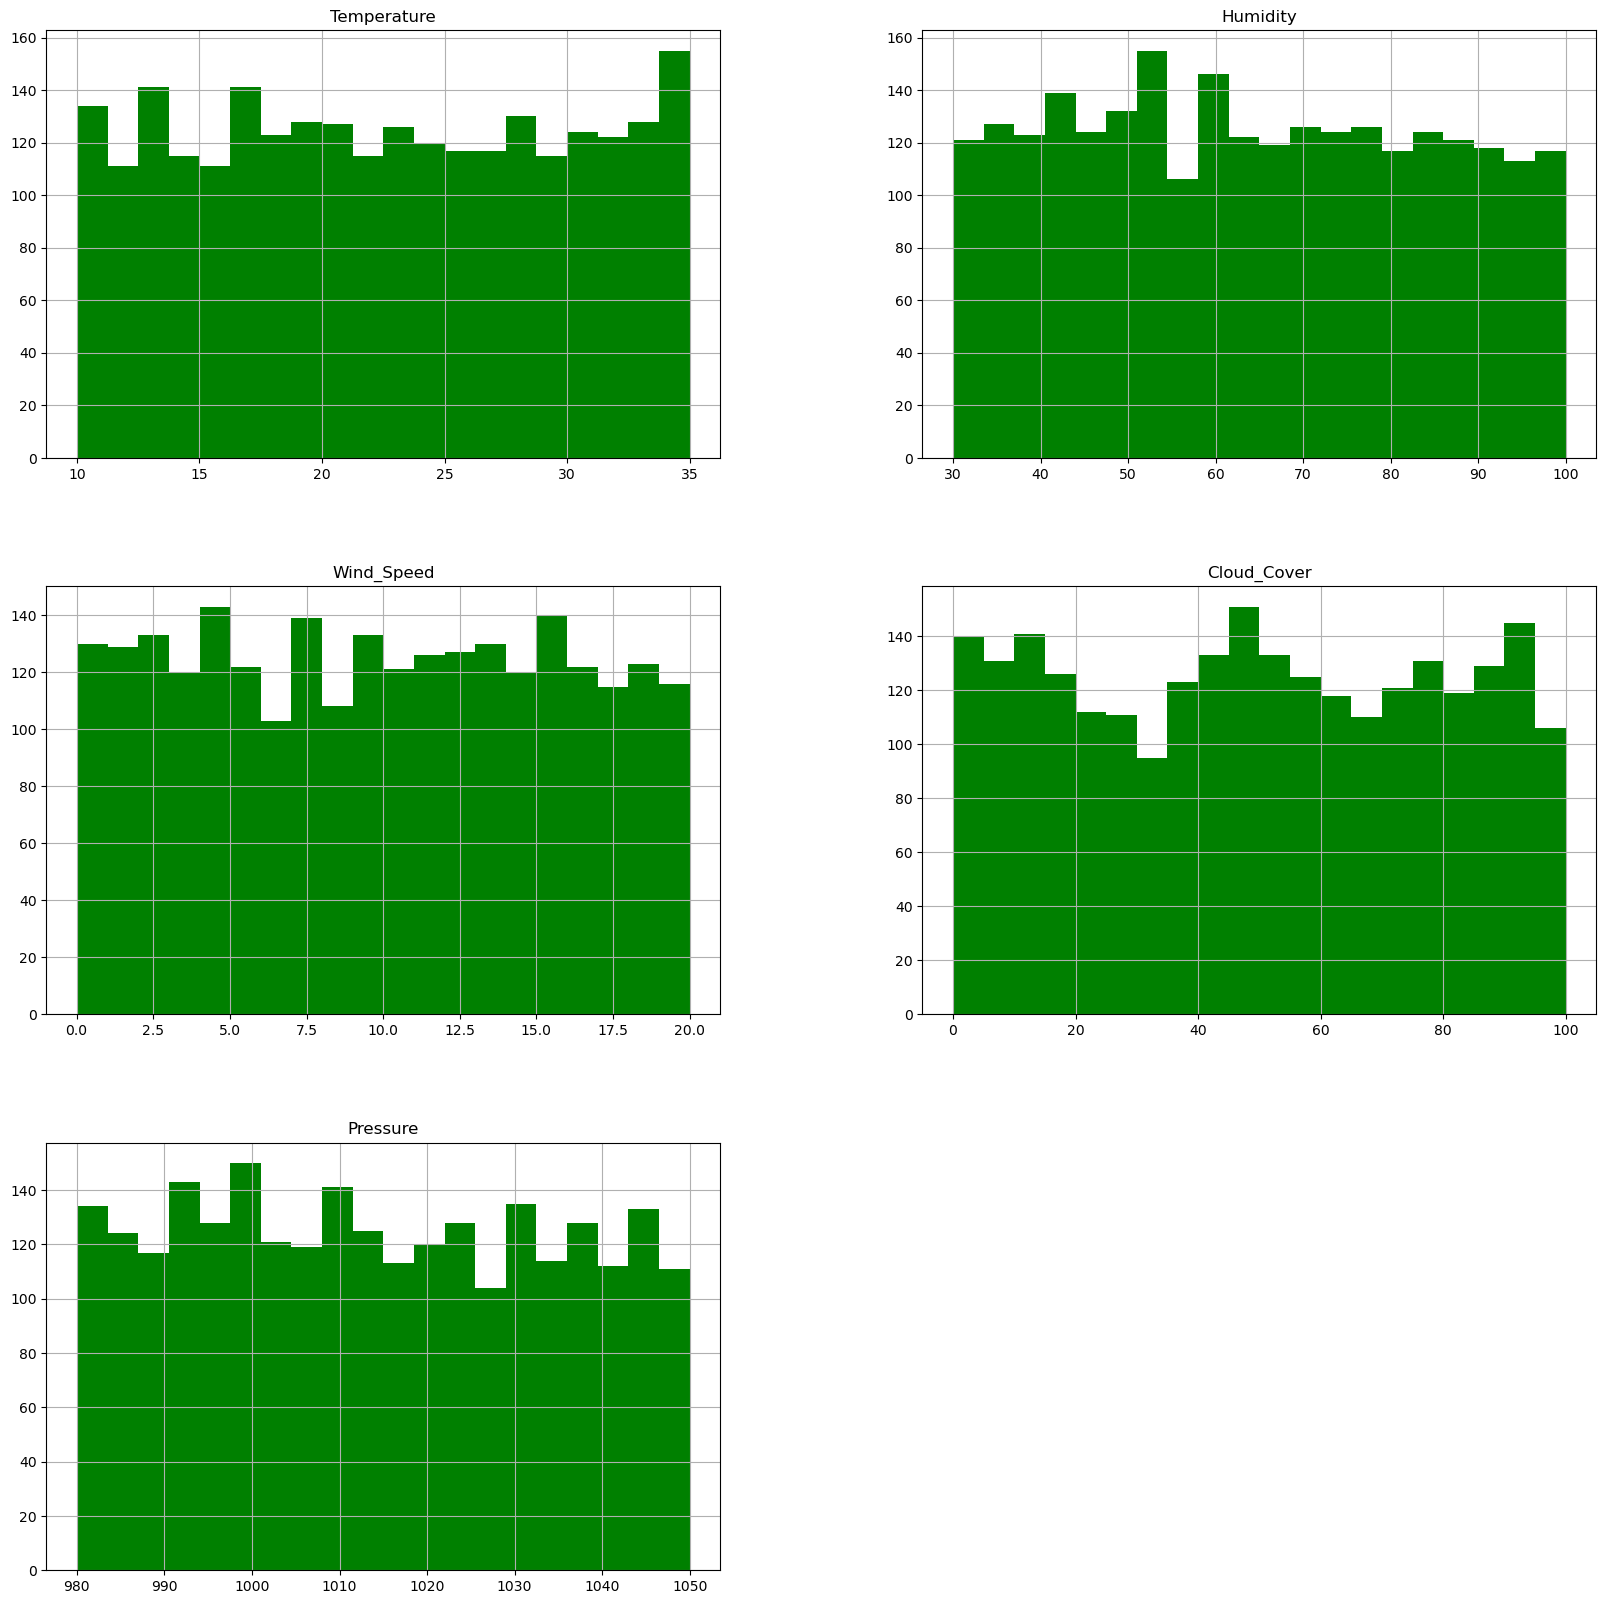

In [34]:
rain_data.hist(figsize=(20,20), color = 'green',bins=20)
plt.show()

#### Box Plot

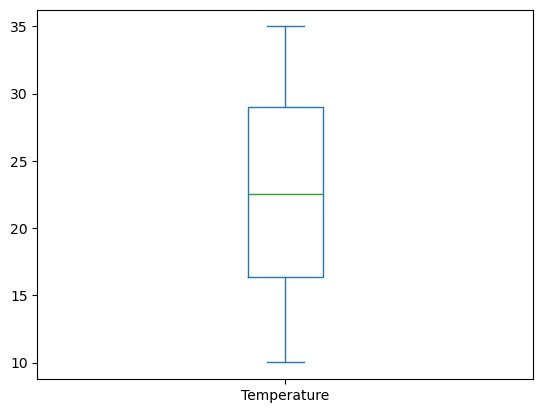

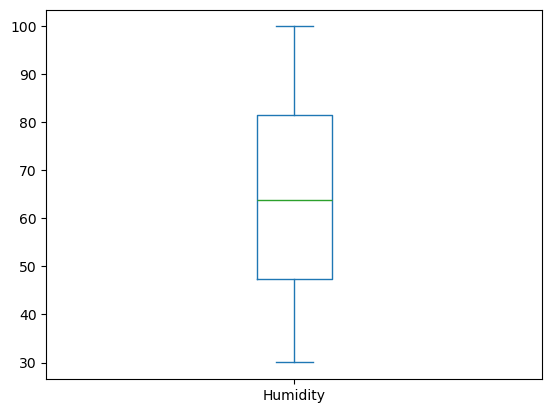

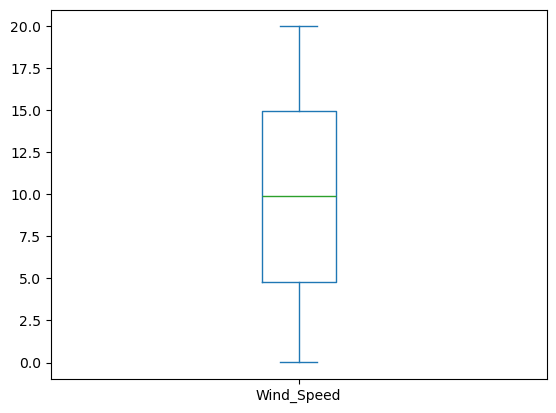

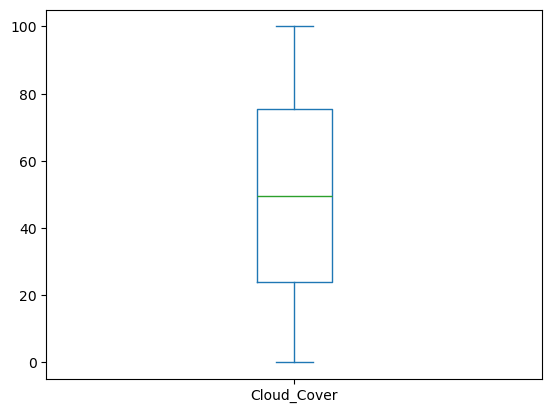

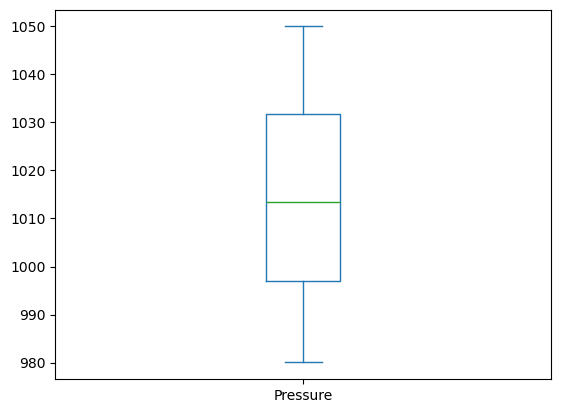

In [36]:
for col in num_col:
    rain_data[col].plot(kind = 'box')
    plt.show()

#### Scatter Plot

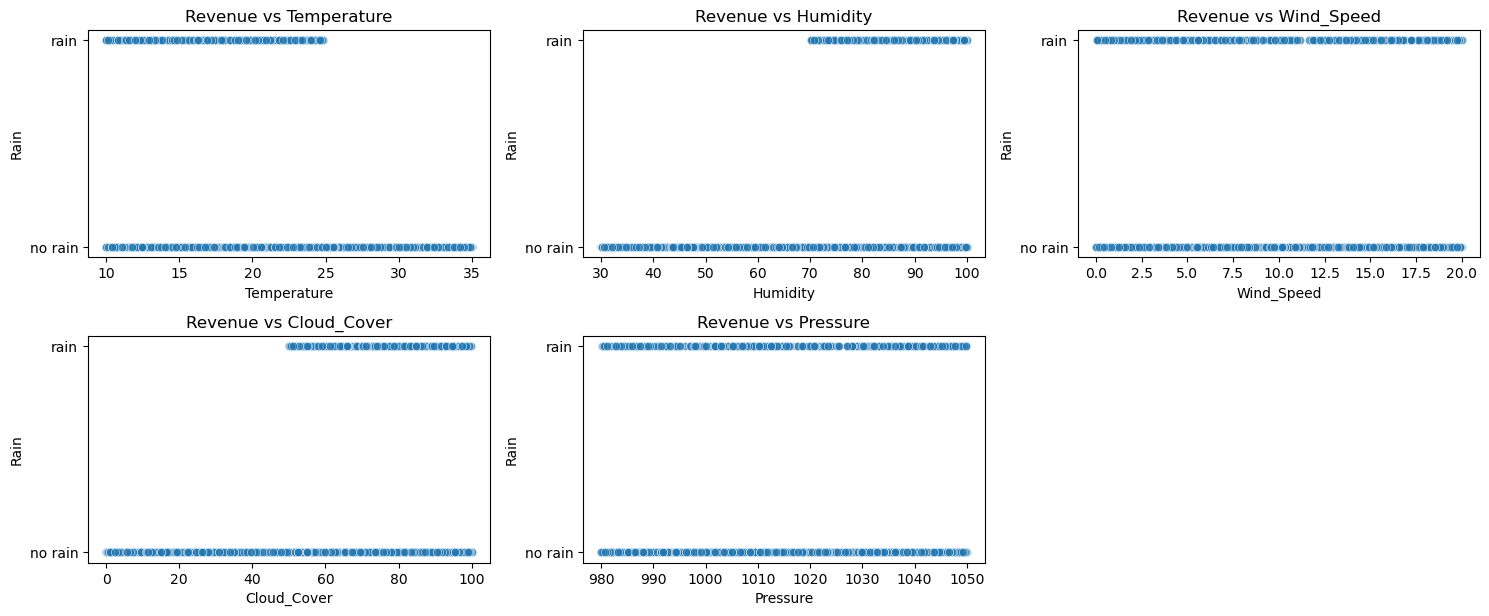

In [38]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(num_col, 1):
    plt.subplot(5, 3, i)
    sns.scatterplot(data=rain_data, x=feature, y='Rain', alpha=0.7)
    plt.title(f'Revenue vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Rain')

plt.tight_layout()
plt.show()

#### Bar chart

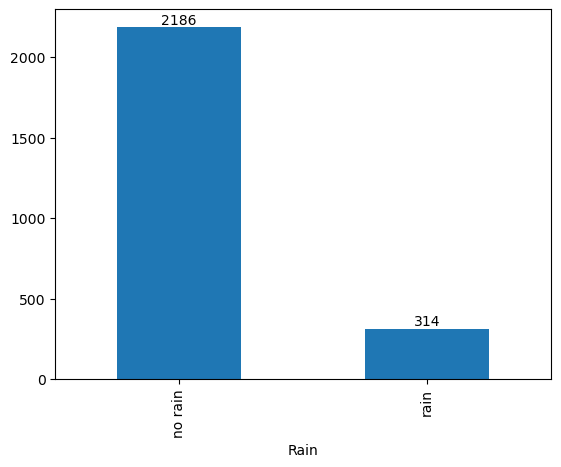

In [40]:
ax = rain_data['Rain'].value_counts().plot(kind = 'bar')
for i in ax.containers:
        ax.bar_label(i)
plt.show()

#### Pie chart

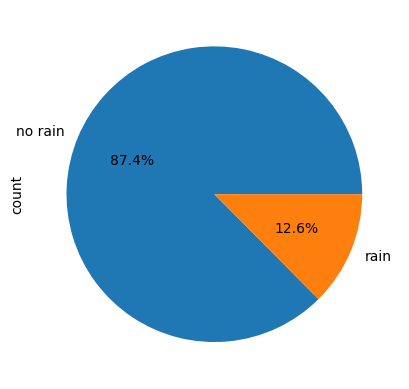

In [42]:
rain_data['Rain'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

#### Heatmap

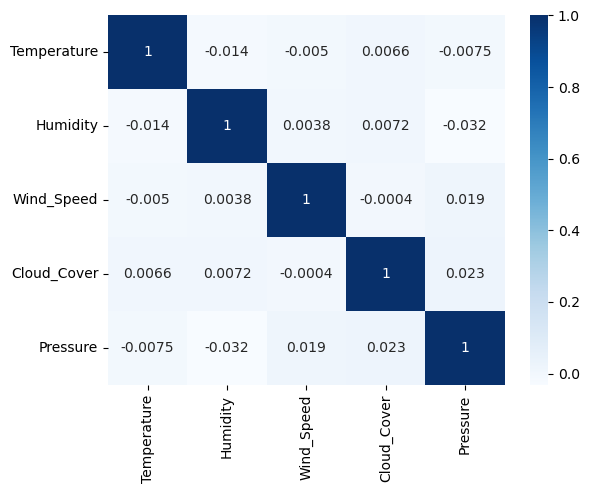

In [44]:
sns.heatmap(corr_data, annot=True, cmap="Blues")
plt.show()

##  Feature Engineering / Data preprocessing 

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
rain_data1 = rain_data.copy()
rain_data1.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [48]:
rain_data1['Rain'] = le.fit_transform(rain_data1['Rain'])
rain_data1.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [49]:
rain_data1['Rain'].value_counts()

Rain
0    2186
1     314
Name: count, dtype: int64

### Handling Imbalance

The model is highly imbalanced so randomly sampling the data for further model buildup

In [52]:
rain_ = rain_data1[rain_data1['Rain']==1]
rain_

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
9,19.586038,82.978293,5.760537,98.014450,1036.503457,1
11,23.222373,76.877943,15.825673,72.869790,980.108934,1
16,10.505460,75.456091,14.797331,99.142331,1011.577194,1
...,...,...,...,...,...,...
2453,17.827472,82.169130,0.469828,83.246856,1030.180411,1
2458,11.970059,84.451618,6.833904,97.413056,1025.504426,1
2473,23.367704,93.753660,7.061520,78.769767,1042.865020,1
2479,23.963077,86.028469,3.612575,84.842039,997.953417,1


In [53]:
no_rain = rain_data1[rain_data1['Rain']==0].sample(320)
no_rain

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
2204,25.094573,73.168269,16.003358,99.539104,1014.534674,0
1025,31.208632,69.333802,7.527002,47.821737,982.080624,0
145,27.597215,51.294047,7.739348,81.778465,1022.756132,0
1214,25.679018,58.101469,12.838285,57.121360,1026.137954,0
1934,13.700967,52.822878,4.304973,46.483856,1048.449873,0
...,...,...,...,...,...,...
2146,24.311255,39.696002,17.695210,41.131225,1032.871658,0
504,18.337687,87.148890,12.193064,7.427954,982.201905,0
624,34.405642,69.720866,16.311672,7.409936,998.839092,0
2304,13.119911,96.541920,11.660873,30.873911,996.278472,0


In [54]:
rain_data2 = pd.concat([rain_, no_rain], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
rain_data2

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,20.216935,38.979817,13.403354,29.489313,994.531136,0
1,13.787150,92.390580,2.761880,50.372833,997.029601,1
2,14.163552,90.089428,14.524855,95.856611,984.573029,1
3,26.544090,64.537896,16.175928,56.936343,991.332382,0
4,33.238233,43.888472,6.380042,2.703440,984.095129,0
...,...,...,...,...,...,...
629,21.153388,73.604870,4.793538,66.814779,1019.546337,1
630,20.635043,92.055361,4.028337,75.363678,1020.679320,1
631,10.835182,79.085020,3.843626,55.573283,1028.101154,1
632,14.158115,39.981400,4.490477,29.541857,1029.817435,0


In [55]:
rain_data2['Rain'].value_counts()

Rain
0    320
1    314
Name: count, dtype: int64

### Seperating the Target and independent variables 

In [57]:
x = rain_data2.drop('Rain',axis=1)
x.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,20.216935,38.979817,13.403354,29.489313,994.531136
1,13.787150,92.390580,2.761880,50.372833,997.029601
2,14.163552,90.089428,14.524855,95.856611,984.573029
3,26.544090,64.537896,16.175928,56.936343,991.332382
4,33.238233,43.888472,6.380042,2.703440,984.095129


In [58]:
y = rain_data2['Rain']
y

0      0
1      1
2      1
3      0
4      0
      ..
629    1
630    1
631    1
632    0
633    1
Name: Rain, Length: 634, dtype: int32

### Splitting Testing and Training Data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
x_train.shape, x_test.shape

((507, 5), (127, 5))

In [63]:
y_train.value_counts()

Rain
0    264
1    243
Name: count, dtype: int64

### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
x_train[num_col]

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
487,12.932889,41.285275,5.227225,70.673457,1022.626620
421,13.758744,98.489076,14.552080,98.653777,1037.075615
104,26.699427,68.041619,17.891273,27.899149,995.174466
114,17.478841,84.518188,0.584854,92.551806,1023.389889
349,34.499058,97.541746,17.729915,31.435377,1007.015911
...,...,...,...,...,...
71,32.174020,55.217371,9.346765,19.468726,1011.394371
106,17.167917,79.712655,15.961831,57.519789,1018.730008
270,26.128463,52.712704,9.155946,5.698035,1028.580099
435,12.889033,74.574227,5.867187,73.003270,994.317467


In [68]:
x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_train

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
487,-1.090865,-1.684957,-0.834646,0.408255,0.410038
421,-0.967869,1.376133,0.776038,1.474996,1.117570
104,0.959406,-0.253172,1.352817,-1.222503,-0.934228
114,-0.413829,0.628522,-1.636523,1.242360,0.447413
349,2.121017,1.325439,1.324946,-1.087685,-0.354381
...,...,...,...,...,...
71,1.774746,-0.939423,-0.123077,-1.543910,-0.139978
106,-0.460136,0.371369,1.019544,-0.093225,0.219230
270,0.874372,-1.073453,-0.156037,-2.068914,0.701565
435,-1.097396,0.096401,-0.724105,0.497078,-0.976193


In [69]:
x_test[num_col] = scaler.transform(x_test[num_col])
x_test

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
396,1.346456,0.018785,0.194378,-1.491144,1.246137
248,-0.718685,-1.869017,0.626193,1.313535,0.368025
215,-0.638771,1.021123,-1.601237,0.991568,0.965587
353,-0.906837,0.389332,-1.184498,0.722171,0.055399
548,-0.898334,0.029322,-0.295100,-2.050895,0.074683
...,...,...,...,...,...
556,-0.479731,0.363380,0.003909,-0.083406,-1.067518
265,-0.371102,1.131661,0.069401,0.477832,-0.307086
473,-0.114057,-0.957327,1.341933,-0.363744,0.839616
464,-1.214122,1.116164,0.714953,1.044474,-0.064979


## Model Development

### Importing Models

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [73]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()
nb_model = GaussianNB()

In [74]:
models = [lr_model,dt_model,rf_model,knn_model,svm_model,nb_model]
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 KNeighborsClassifier(),
 SVC(),
 GaussianNB()]

### Model Training

In [76]:
for model in models:
    model.fit(x_train,y_train)

### Model Evaluation

#### Classification Report

In [79]:
from sklearn.metrics import classification_report

In [80]:
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------")
    print(" ")

LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        56
           1       0.92      0.94      0.93        71

    accuracy                           0.92       127
   macro avg       0.92      0.92      0.92       127
weighted avg       0.92      0.92      0.92       127

-------------------------------------------------------
 
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        71

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127

-------------------------------------------------------
 
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        71

 

#### Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix

LogisticRegression


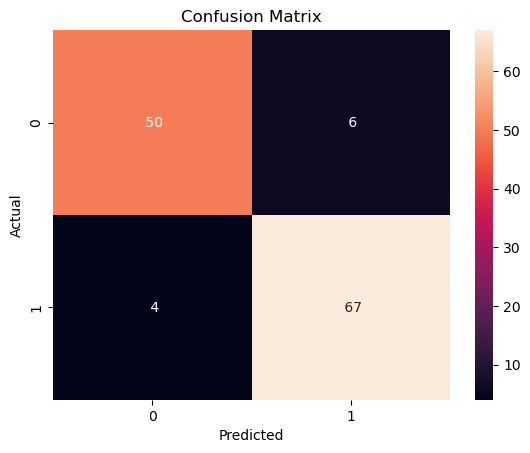

-------------------------------------------------------
 
DecisionTreeClassifier


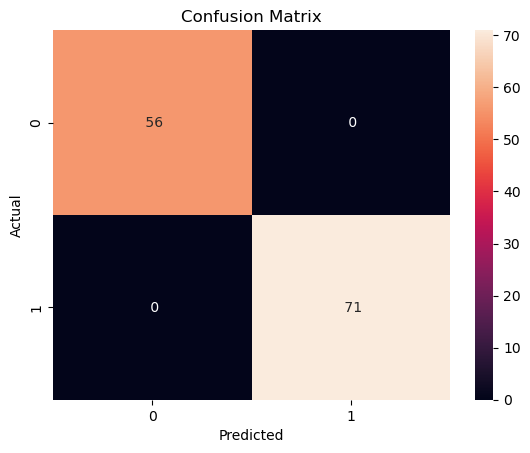

-------------------------------------------------------
 
RandomForestClassifier


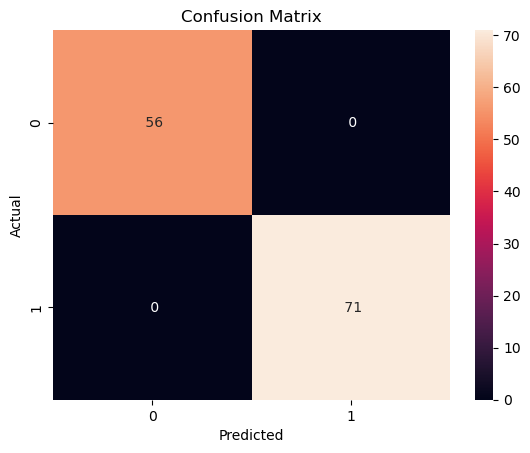

-------------------------------------------------------
 
KNeighborsClassifier


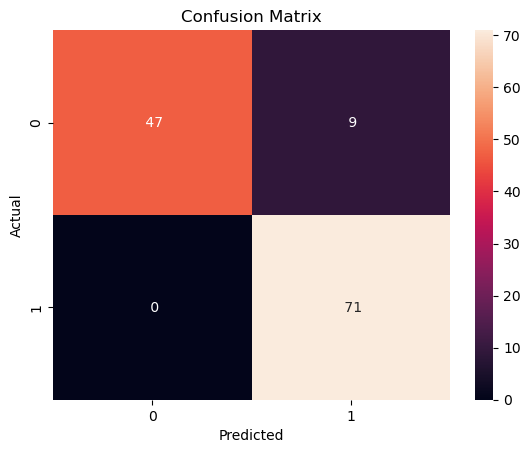

-------------------------------------------------------
 
SVC


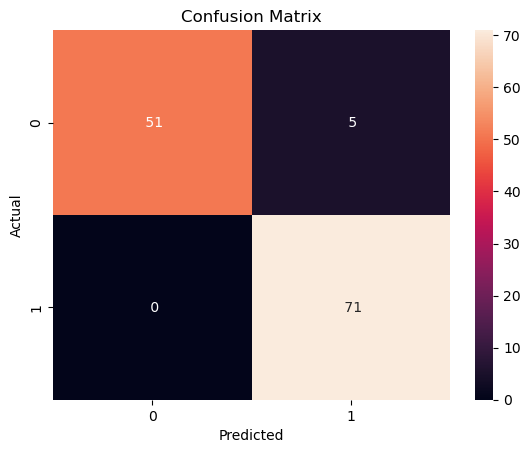

-------------------------------------------------------
 
GaussianNB


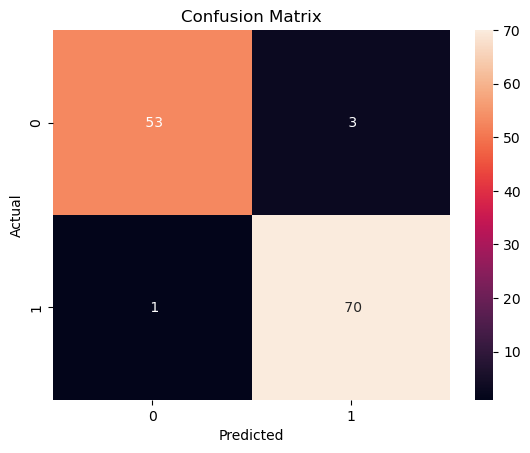

-------------------------------------------------------
 


In [83]:
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt= " ")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-------------------------------------------------------")
    print(" ")

### Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
%%time
for model in models:
    acc_ls =  cross_val_score(model,x,y, scoring='accuracy', cv=5)
    mean_acc = round(acc_ls.mean()*100,2)
    modelname = model.__class__.__name__
    print(f"{modelname}'s Cross Validation Accuracy is = {mean_acc}%")
    print("-------------------------------------------------------")

LogisticRegression's Cross Validation Accuracy is = 89.59%
-------------------------------------------------------
DecisionTreeClassifier's Cross Validation Accuracy is = 100.0%
-------------------------------------------------------
RandomForestClassifier's Cross Validation Accuracy is = 99.84%
-------------------------------------------------------
KNeighborsClassifier's Cross Validation Accuracy is = 92.59%
-------------------------------------------------------
SVC's Cross Validation Accuracy is = 81.7%
-------------------------------------------------------
GaussianNB's Cross Validation Accuracy is = 96.06%
-------------------------------------------------------
CPU times: total: 1.94 s
Wall time: 1.04 s


The accuracy of the Random Forest Regressor is 99.84%, which shows that the model is already performing very well. Tuning the hyperparameters further may lead to overfitting.

## Customizing Prediction

In [89]:
rain_data.head(1)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain


In [90]:
def predict_machine_status(model, scaler, num_col):
    temp = float(input("Enter the Temperature = "))
    hum = float(input("Enter the Humidity = "))
    ws = float(input("Enter the Wind Speed = "))
    CC = float(input("Enter the Cloud Cover = "))
    press = float(input("Enter the pressure = "))

    input_data = {
        "Temperature": [temp],
        "Humidity": [hum],
        "Wind_Speed": [ws],
        "Cloud_Cover": [CC],
        "Pressure": [press]
    }
    
    input_df = pd.DataFrame(input_data)
    input_df[num_col] = scaler.transform(input_df[num_col])

    input_for_prediction = input_df.values.reshape(1, -1)
    prediction = model.predict(input_for_prediction)
    
    if prediction[0] == 1:
        return "There will be Rain"
    else:
        return "There won't be Rain"

#### Test Case - 1 

In [92]:
result = predict_machine_status(rf_model, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter the Temperature =  19.9
Enter the Humidity =  41.26
Enter the Wind Speed =  3.59
Enter the Cloud Cover =  98.1
Enter the pressure =  989


-------------------------------------- 
There won't be Rain


#### Test Case - 2

In [171]:
result = predict_machine_status(rf_model, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter the Temperature =  23.22
Enter the Humidity =  76.87
Enter the Wind Speed =  15.82
Enter the Cloud Cover =  72.86
Enter the pressure =  980.10


-------------------------------------- 
There will be Rain


#### Test Case - 3

In [96]:
result = predict_machine_status(rf_model, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter the Temperature =  25.44
Enter the Humidity =  99.53
Enter the Wind Speed =  4.1
Enter the Cloud Cover =  92.73
Enter the pressure =  1042


-------------------------------------- 
There won't be Rain


#### Test Case - 4

In [98]:
result = predict_machine_status(rf_model, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter the Temperature =  10.5
Enter the Humidity =  75.45
Enter the Wind Speed =  14.79
Enter the Cloud Cover =  99.14
Enter the pressure =  1011.57


-------------------------------------- 
There will be Rain


#### Test Case - 5

In [100]:
result = predict_machine_status(rf_model, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter the Temperature =  23.36
Enter the Humidity =  93.36
Enter the Wind Speed =  7.1
Enter the Cloud Cover =  78.8
Enter the pressure =  1042.9


-------------------------------------- 
There will be Rain


---